<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/main/Pandas_TP_01_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df =pd.read_csv('./datasets/prop_arg_2021_filtrado.csv')
df.shape
#registros originales : 460154 , columnas 20
#registros filtrados  :  95495 , columnas 16

(95495, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95495 entries, 0 to 95494
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        95495 non-null  object 
 1   start_date                95495 non-null  object 
 2   end_date                  90373 non-null  object 
 3   created_on                95495 non-null  object 
 4   latitud                   91703 non-null  float64
 5   longitud                  91703 non-null  float64
 6   place_l3                  95060 non-null  object 
 7   place_l4                  3725 non-null   object 
 8   property_type             95495 non-null  object 
 9   property_rooms            94398 non-null  float64
 10  property_bedrooms         84348 non-null  float64
 11  property_surface_total    90512 non-null  float64
 12  property_surface_covered  92059 non-null  float64
 13  property_price            94306 non-null  float64
 14  proper

In [ ]:
'''
L3 = Barrio
L4 = Sub barrio de Palermo
'''

'\nL3 = Barrio\nL4 = Sub barrio de Palermo\n'

In [ ]:
#si la columna   'place_l3' (Barrio)   tiene 0 NaN
df.place_l3.isnull().sum()

435

In [ ]:
#A los NaN los coloco en la categoria 'Barrio SinDefinir'
df['place_l3'].fillna('Barrio SinDefinir', inplace=True)
'''ejecutar antes de categorizar, parapoder cambiar los NaN'''

'ejecutar antes de categorizar, parapoder cambiar los NaN'

In [ ]:
df.place_l3.value_counts()

place_l3
Palermo                 14534
Belgrano                 9038
Caballito                7238
Recoleta                 6412
Villa Urquiza            4749
Almagro                  4119
Nuñez                    3587
Villa Crespo             3206
Flores                   3153
Barrio Norte             3007
Balvanera                2572
Colegiales               1964
Villa Devoto             1964
Villa del Parque         1842
Saavedra                 1838
Puerto Madero            1542
San Telmo                1396
San Cristobal            1311
San Nicolás              1304
Retiro                   1275
Barracas                 1261
Boedo                    1252
Floresta                 1211
Monserrat                1123
Parque Chacabuco         1085
Villa Pueyrredón         1018
Coghlan                   993
Villa Luro                747
Mataderos                 726
Chacarita                 704
Liniers                   675
Villa Ortuzar             665
Parque Patricios          645
V

In [ ]:
#place_l3 lo paso a Dtype Category
df.place_l3 = pd.Categorical(df.place_l3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95495 entries, 0 to 95494
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        95495 non-null  object  
 1   start_date                95495 non-null  object  
 2   end_date                  90373 non-null  object  
 3   created_on                95495 non-null  object  
 4   latitud                   91703 non-null  float64 
 5   longitud                  91703 non-null  float64 
 6   place_l3                  95495 non-null  category
 7   place_l4                  3725 non-null   object  
 8   property_type             95495 non-null  object  
 9   property_rooms            94398 non-null  float64 
 10  property_bedrooms         84348 non-null  float64 
 11  property_surface_total    90512 non-null  float64 
 12  property_surface_covered  92059 non-null  float64 
 13  property_price            94306 non-null  floa

In [ ]:
'''
L4 = Sub barrio de Palermo
'''
#si la columna   'place_l4' (Sub barrio de Palermo)  tiene 91770 NaN
df.place_l4.isnull().sum()

91770

In [ ]:
#A los NaN los coloco en la categoria 'Barrio privado SinDefinir'
df['place_l4'].fillna('Sub barrio SinDefinir', inplace=True)
'''ejecutar antes de categorizar, parapoder cambiar los NaN'''

'ejecutar antes de categorizar, parapoder cambiar los NaN'

In [ ]:
df.place_l4.value_counts()

place_l4
Sub barrio SinDefinir    91770
Palermo Hollywood         1585
Palermo Chico             1147
Palermo Soho               821
Palermo Viejo              172
Name: count, dtype: int64

In [ ]:
#place_l4 lo paso a Dtype Category
df.place_l4 = pd.Categorical(df.place_l4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95495 entries, 0 to 95494
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        95495 non-null  object  
 1   start_date                95495 non-null  object  
 2   end_date                  90373 non-null  object  
 3   created_on                95495 non-null  object  
 4   latitud                   91703 non-null  float64 
 5   longitud                  91703 non-null  float64 
 6   place_l3                  95495 non-null  category
 7   place_l4                  95495 non-null  category
 8   property_type             95495 non-null  object  
 9   property_rooms            94398 non-null  float64 
 10  property_bedrooms         84348 non-null  float64 
 11  property_surface_total    90512 non-null  float64 
 12  property_surface_covered  92059 non-null  float64 
 13  property_price            94306 non-null  floa

In [ ]:
'''
#convertir las columnas a sus tipo de datos
#convertir las fechas
df['start_date'] = pd.to_datetime(df['start_date'], errors = 'coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors = 'coerce')
df['created_on'] = pd.to_datetime(df['created_on'], errors = 'coerce')
df.info()
'''

"\n#convertir las columnas a sus tipo de datos\n#convertir las fechas\ndf['start_date'] = pd.to_datetime(df['start_date'], errors = 'coerce')\ndf['end_date'] = pd.to_datetime(df['end_date'], errors = 'coerce')\ndf['created_on'] = pd.to_datetime(df['created_on'], errors = 'coerce')\ndf.info()\n"

In [ ]:
#La columna   'property_type'(tipo: casa,ph,dep,,,)   tiene 0 NaN
df.property_type.isnull().sum()

0

In [ ]:
df.property_type.value_counts()

property_type
Departamento    81871
PH               9332
Casa             4292
Name: count, dtype: int64

In [ ]:
#property_type lo paso a Dtype Category
df.property_type = pd.Categorical(df.property_type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95495 entries, 0 to 95494
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        95495 non-null  object  
 1   start_date                95495 non-null  object  
 2   end_date                  90373 non-null  object  
 3   created_on                95495 non-null  object  
 4   latitud                   91703 non-null  float64 
 5   longitud                  91703 non-null  float64 
 6   place_l3                  95495 non-null  category
 7   place_l4                  95495 non-null  category
 8   property_type             95495 non-null  category
 9   property_rooms            94398 non-null  float64 
 10  property_bedrooms         84348 non-null  float64 
 11  property_surface_total    90512 non-null  float64 
 12  property_surface_covered  92059 non-null  float64 
 13  property_price            94306 non-null  floa

In [ ]:
#si la columna   'property_currency'(moneda)   tiene NaN
df.property_currency.isnull().sum()

0

In [ ]:
# tiene 94249 USD + 1246 SinDefinir  = 95495 registros totales
'''cambiar a --------Moneda SinDefinir ------------'''
df.property_currency.value_counts()

property_currency
USD           94249
SinDefinir     1246
Name: count, dtype: int64

In [ ]:
#property_type lo paso a Dtype Category
df.property_currency = pd.Categorical(df.property_currency)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95495 entries, 0 to 95494
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        95495 non-null  object  
 1   start_date                95495 non-null  object  
 2   end_date                  90373 non-null  object  
 3   created_on                95495 non-null  object  
 4   latitud                   91703 non-null  float64 
 5   longitud                  91703 non-null  float64 
 6   place_l3                  95495 non-null  category
 7   place_l4                  95495 non-null  category
 8   property_type             95495 non-null  category
 9   property_rooms            94398 non-null  float64 
 10  property_bedrooms         84348 non-null  float64 
 11  property_surface_total    90512 non-null  float64 
 12  property_surface_covered  92059 non-null  float64 
 13  property_price            94306 non-null  floa

In [ ]:
# Sin hay ID repetidos
''' No hay id repetidos Lengh 95495 registros'''
df.id.value_counts()

id
CyZu6IaZgmQYGk8jmPajCg==    1
2EJoSxf3DGe4vWCQ0Qieug==    1
qTFXbqLzlOptfACpBv1t1Q==    1
lCaRBzaOj7liQTERwx9LsQ==    1
KDLHDiuBWlbnMJfODEPXhw==    1
                           ..
8uUAjIjppIKm3U0+u3rJRA==    1
pCi1fMN2ybNXbOLfdNXUyA==    1
lnvX18r3sCnkYO0MFod7HQ==    1
iuTlhhT4CER/0UILFzL1HA==    1
9OVDfhoDvkY4rr/SX0ggVw==    1
Name: count, Length: 95495, dtype: int64

In [ ]:
'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95495 entries, 0 to 95494
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        95495 non-null  object           Nº id unico
 1   start_date                95495 non-null  datetime64[ns]   fecha ini             #time
 2   end_date                  90373 non-null  datetime64[ns]   fecha fin             #time
 3   created_on                95495 non-null  datetime64[ns]   fecha creacion        #time
 4   latitud                   91703 non-null  float64          Nº coordenada
 5   longitud                  91703 non-null  float64          Nº coordenada
 6   place_l3                  95495 non-null  category         CAT Barrios de CABA
 7   place_l4                  95495 non-null  category         CAT Sub barrios
 8   property_type             95495 non-null  category         CAT Casa, Dep, PH
 9   property_rooms            94398 non-null  float64          Nº ambientes
 10  property_bedrooms         84348 non-null  float64          Nº dormitorio
 11  property_surface_total    90512 non-null  float64          Nº superficie total
 12  property_surface_covered  92059 non-null  float64          Nº superficie cubierta(construida)
 13  property_price            94306 non-null  float64          Nº Precio
 14  property_currency         95495 non-null  category         CAT Moneda
 15  property_title            95495 non-null  object           String (Titulo para redes sociales)
dtypes: category(4), datetime64[ns](3), float64(7), object(2)
memory usage: 9.1+ MB

'''

"\n<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 95495 entries, 0 to 95494\nData columns (total 16 columns):\n #   Column                    Non-Null Count  Dtype\n---  ------                    --------------  -----\n 0   id                        95495 non-null  object           Nº id unico\n 1   start_date                95495 non-null  datetime64[ns]   fecha ini             #time\n 2   end_date                  90373 non-null  datetime64[ns]   fecha fin             #time\n 3   created_on                95495 non-null  datetime64[ns]   fecha creacion        #time\n 4   latitud                   91703 non-null  float64          Nº coordenada\n 5   longitud                  91703 non-null  float64          Nº coordenada\n 6   place_l3                  95495 non-null  category         CAT Barrios de CABA\n 7   place_l4                  95495 non-null  category         CAT Sub barrios\n 8   property_type             95495 non-null  category         CAT Casa, Dep, PH\n 9   property_

In [ ]:
#Variables CUALITATIVAS
#(Texto[nominales,ordinales], Numerica[nominales,ordinales])   .value_count()
'''
Cualitativas
    TEXTO Nominales
        6  place_l3                   CAT Barrios de CABA
        7  place_l4                   CAT Sub barrios
        8  property_type              CAT Casa, Dep, PH
        14 property_currency          CAT Moneda
        15 property_title             String (Titulo para redes sociales)
    TEXTO Ordinales
        -
    NUMERICAS Nominales
        0  id                         Nº id unico
    NUMERICAS Ordinales
        4  latitud                    Nº coordenada
        5  longitud                   Nº coordenada

'''
#Variables CUANTITATIVAS
#(Discreta, Continua)   .describe()
'''
Cuantitativas
    DISCRETA
        9  property_rooms             Nº ambientes
        10 property_bedrooms          Nº dormitorio

    CONTINUA
        1  start_date                 fecha ini             #time
        2  end_date                   fecha fin             #time
        3  created_on                 fecha creacion        #time
        11 property_surface_total     Nº superficie total
        12 property_surface_covered   Nº superficie cubierta(construida)
        13 property_price             Nº Precio

'''

'\nCuantitativas\n    DISCRETA\n        9  property_rooms             Nº ambientes\n        10 property_bedrooms          Nº dormitorio\n\n    CONTINUA\n        1  start_date                 fecha ini             #time\n        2  end_date                   fecha fin             #time\n        3  created_on                 fecha creacion        #time\n        11 property_surface_total     Nº superficie total\n        12 property_surface_covered   Nº superficie cubierta(construida)\n        13 property_price             Nº Precio\n\n'

1) a) EXPLORACION INICIAL


*   # Variables Cuantitativas: calcular medidas de resumen : media, mediana, moda, etc.
*   # Variables Cualitativas: mostrar cantidad de valores posibles, y frecuencias de cada uno.
*   # Determinar vriables irrelevantes en el análisis
*   # Realizar un análisis gráfico de las distribuciones de las variables más relevantes
*   # Analizar las correlaciones existentes entre las variables



In [ ]:
# Variables Cuantitativas: calcular medidas de resumen : media, mediana, moda, etc.

In [ ]:
# Me fijo si las fechas start_date son todas del 2021
(df['start_date'] >= '2021-01-01').sum()

95495

In [ ]:
(df['start_date'] <= '2021-12-31').sum()

95495

In [ ]:
# separar las fechas y tomar relevantes el mes, el año es 2021 siempres.
# descartar días es irrelevante

In [ ]:
# divido la fecha en columnas 'anio','mes',dia'
# Que pasa si la fecha es invalida ???
import numpy as np
import datetime

df[['year_start','month_start','day_start']] = df['start_date'].str.split('-',expand=True)
df.drop(columns ='start_date', inplace=True)
df.drop(columns ='year_start', inplace=True)
df.drop(columns ='day_start', inplace=True)

In [ ]:
df[['year_end','month_end','day_end']] = df['end_date'].str.split('-',expand=True)
df.drop(columns ='end_date', inplace=True)
df.drop(columns ='year_end', inplace=True)
df.drop(columns ='day_end', inplace=True)

In [ ]:
df[['year_on','month_on','day_on']] = df['created_on'].str.split('-',expand=True)
df.drop(columns ='created_on', inplace=True)
df.drop(columns ='year_on', inplace=True)
df.drop(columns ='day_on', inplace=True)

In [ ]:
df

,id,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,month_start,month_end,month_on
0,CyZu6IaZgmQYGk8jmPajCg==,NaN,NaN,Barrio SinDefinir,Sub barrio SinDefinir,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA,09,09,09
1,d3Z0MblSb2IMBoOBMGJEEQ==,-34.637319,-58.361124,Boca,Sub barrio SinDefinir,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO,09,09,09
2,rL7qPkQnomsMGu2ViS3sBw==,-34.628647,-58.361871,Boca,Sub barrio SinDefinir,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur,09,09,09
3,IfZHM0GX583/RU9QQb8Orw==,-34.599506,-58.404138,Once,Sub barrio SinDefinir,Departamento,2.0,1.0,43.0,43.0,NaN,SinDefinir,Av Puyrredon al 924,09,03,09
4,vuX/ccLAMVml4qWRFcOJUA==,-34.610027,-58.401934,Once,Sub barrio SinDefinir,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once,09,01,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95490,v4f5Un9jO7hsD02MWLkKBQ==,-34.603245,-58.489810,Villa del Parque,Sub barrio SinDefinir,Departamento,4.0,3.0,130.0,100.0,220000.0,USD,Espectacular 4 amb130m2 con Balcon Terraza!!!,01,09,01
95491,Aq/Z+XyS8FHbOOxed4xtTw==,-34.614063,-58.482814,Villa del Parque,Sub barrio SinDefinir,Departamento,3.0,2.0,68.0,60.0,161000.0,USD,3 ambientes con cochera listo para habitar!,01,02,01
95492,Rmamz8v4Wkh5xF7PA59Jqw==,-34.614175,-58.479062,Villa del Parque,Sub barrio SinDefinir,Departamento,1.0,1.0,51.0,30.0,75500.0,USD,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...,01,01,01
95493,7yl8Dfx5wobH21YdMU+Kgg==,-34.614175,-58.479062,Villa del Parque,Sub barrio SinDefinir,Departamento,1.0,1.0,37.0,31.0,74500.0,USD,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...,01,01,01


In [ ]:
# Nº ambientes
df.property_rooms.describe()

count    94398.00000
mean         2.82917
std          1.43622
min          1.00000
25%          2.00000
50%          3.00000
75%          4.00000
max         40.00000
Name: property_rooms, dtype: float64

In [ ]:
# Nº dormitorio
df.property_bedrooms.describe()

count    84348.000000
mean         2.020546
std          1.138824
min         -1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         70.000000
Name: property_bedrooms, dtype: float64

In [ ]:
# fecha mes inicial
df.month_start.describe()

count     95495
unique       12
top          12
freq      10063
Name: month_start, dtype: object

In [ ]:
# fecha mes final
df.month_end.describe()

count     90373
unique       12
top          06
freq      18025
Name: month_end, dtype: object

In [ ]:
# fecha mes creacion
df.month_on.describe()

count     95495
unique       12
top          12
freq      10063
Name: month_on, dtype: object

In [ ]:
# Nº superficie total
df.property_surface_total.describe()

count     90512.000000
mean        110.879165
std        1028.046145
min          10.000000
25%          45.000000
50%          65.000000
75%         105.000000
max      137000.000000
Name: property_surface_total, dtype: float64

In [ ]:
# Nº superficie cubierta(construida)
df.property_surface_covered.describe()

count     92059.000000
mean         89.588025
std        1030.001595
min           1.000000
25%          40.000000
50%          58.000000
75%          89.000000
max      217000.000000
Name: property_surface_covered, dtype: float64

In [ ]:
# Nº Precio
df.property_price.describe()

count    9.430600e+04
mean     2.261015e+05
std      3.185557e+05
min      0.000000e+00
25%      9.500000e+04
50%      1.430000e+05
75%      2.370000e+05
max      2.140000e+07
Name: property_price, dtype: float64

In [ ]:
# Variables Cualitativas: mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [ ]:
# CAT Barrios de CABA
df.place_l3.value_counts()

place_l3
Palermo                 14534
Belgrano                 9038
Caballito                7238
Recoleta                 6412
Villa Urquiza            4749
Almagro                  4119
Nuñez                    3587
Villa Crespo             3206
Flores                   3153
Barrio Norte             3007
Balvanera                2572
Colegiales               1964
Villa Devoto             1964
Villa del Parque         1842
Saavedra                 1838
Puerto Madero            1542
San Telmo                1396
San Cristobal            1311
San Nicolás              1304
Retiro                   1275
Barracas                 1261
Boedo                    1252
Floresta                 1211
Monserrat                1123
Parque Chacabuco         1085
Villa Pueyrredón         1018
Coghlan                   993
Villa Luro                747
Mataderos                 726
Chacarita                 704
Liniers                   675
Villa Ortuzar             665
Parque Patricios          645
V

In [ ]:
# CAT Sub barrios
df.place_l4.value_counts()

place_l4
Sub barrio SinDefinir    91770
Palermo Hollywood         1585
Palermo Chico             1147
Palermo Soho               821
Palermo Viejo              172
Name: count, dtype: int64

In [ ]:
# CAT Casa, Dep, PH
df.property_type.value_counts()

property_type
Departamento    81871
PH               9332
Casa             4292
Name: count, dtype: int64

In [ ]:
# CAT Moneda
df.property_currency.value_counts()

property_currency
USD           94249
SinDefinir     1246
Name: count, dtype: int64

In [ ]:
# String (Titulo para redes sociales)
df.property_title.value_counts()

property_title
Departamento - Palermo                                                                                  1504
Departamento - Recoleta                                                                                 1368
Departamento - Belgrano                                                                                 1145
Departamento - Caballito                                                                                 956
Departamento - Almagro                                                                                   678
                                                                                                        ... 
EVOQUE OLAZABAL - Mono/Studio de categoría APTO PROFESIONAL                                                1
EVOQUE OLAZABAL - 3 ambientes de categoría APTO PROFESIONAL                                                1
Gran 3 ambientes en pleno Villa del Parque                                                                 1
Vent

In [ ]:
# Nº id unico
df.id.value_counts()

id
CyZu6IaZgmQYGk8jmPajCg==    1
2EJoSxf3DGe4vWCQ0Qieug==    1
qTFXbqLzlOptfACpBv1t1Q==    1
lCaRBzaOj7liQTERwx9LsQ==    1
KDLHDiuBWlbnMJfODEPXhw==    1
                           ..
8uUAjIjppIKm3U0+u3rJRA==    1
pCi1fMN2ybNXbOLfdNXUyA==    1
lnvX18r3sCnkYO0MFod7HQ==    1
iuTlhhT4CER/0UILFzL1HA==    1
9OVDfhoDvkY4rr/SX0ggVw==    1
Name: count, Length: 95495, dtype: int64

In [ ]:
# Nº coordenada
df.latitud.value_counts()

latitud
-34.541250    150
-34.619406    128
-34.604538    116
-34.541616    106
-34.581910     97
             ... 
-34.558604      1
-34.638575      1
-34.589646      1
-34.585809      1
-34.549662      1
Name: count, Length: 45695, dtype: int64

In [ ]:
# Nº coordenada
df.longitud.value_counts()

longitud
-58.472966    150
-58.451999    128
-58.424956    116
-58.473377    106
-58.449381     97
             ... 
-58.426576      1
-58.430403      1
-58.426660      1
-58.411774      1
-58.482814      1
Name: count, Length: 45487, dtype: int64

In [ ]:
#Variables CUALITATIVAS
#(Texto[nominales,ordinales], Numerica[nominales,ordinales])   .value_counts()
'''
Cualitativas
    TEXTO Nominales
        6  place_l3                   CAT Barrios de CABA                  # RELEVANTE
        7  place_l4                   CAT Sub barrios                      # RELEVANTE
        8  property_type              CAT Casa, Dep, PH                    # RELEVANTE
        14 property_currency          CAT Moneda                           # irelevante
        15 property_title             String (Titulo para redes sociales)  # irelevante
    TEXTO Ordinales
        -
    NUMERICAS Nominales
        0  id                         Nº id unico                          # irelevante
    NUMERICAS Ordinales
        4  latitud                    Nº coordenada                        # irelevante
        5  longitud                   Nº coordenada                        # irelevante

'''
#Variables CUANTITATIVAS
#(Discreta, Continua)   .describe()
'''
Cuantitativas
    DISCRETA
        9  property_rooms             Nº ambientes                          # RELEVANTE
        10 property_bedrooms          Nº dormitorio                         # RELEVANTE

    CONTINUA
        1  month_date                 fecha ini             #time           # RELEVANTE
        2  month_date                 fecha fin             #time           # RELEVANTE
        3  month_on                   fecha creacion        #time           # RELEVANTE
        11 property_surface_total     Nº superficie total                   # RELEVANTE
        12 property_surface_covered   Nº superficie cubierta(construida)    # RELEVANTE
        13 property_price             Nº Precio                             # RELEVANTE

'''

'\nCuantitativas\n    DISCRETA\n        9  property_rooms             Nº ambientes                          # RELEVANTE\n        10 property_bedrooms          Nº dormitorio                         # RELEVANTE\n\n    CONTINUA\n        1  month_date                 fecha ini             #time           # RELEVANTE\n        2  month_date                 fecha fin             #time           # RELEVANTE\n        3  month_on                   fecha creacion        #time           # RELEVANTE\n        11 property_surface_total     Nº superficie total                   # RELEVANTE\n        12 property_surface_covered   Nº superficie cubierta(construida)    # RELEVANTE\n        13 property_price             Nº Precio                             # RELEVANTE\n\n'

In [ ]:
df.columns

Index(['id', 'latitud', 'longitud', 'place_l3', 'place_l4', 'property_type',
       'property_rooms', 'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price', 'property_currency',
       'property_title', 'month_start', 'month_end', 'month_on'],
      dtype='object')

In [ ]:
new_col_order=['id', 'month_start', 'month_end', 'month_on', 'latitud', 'longitud', 'place_l3', 'place_l4', 'property_type',
       'property_rooms', 'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price', 'property_currency',
       'property_title']
df_order = df[new_col_order]

In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95495 entries, 0 to 95494
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        95495 non-null  object  
 1   month_start               95495 non-null  object  
 2   month_end                 90373 non-null  object  
 3   month_on                  95495 non-null  object  
 4   latitud                   91703 non-null  float64 
 5   longitud                  91703 non-null  float64 
 6   place_l3                  95495 non-null  category
 7   place_l4                  95495 non-null  category
 8   property_type             95495 non-null  category
 9   property_rooms            94398 non-null  float64 
 10  property_bedrooms         84348 non-null  float64 
 11  property_surface_total    90512 non-null  float64 
 12  property_surface_covered  92059 non-null  float64 
 13  property_price            94306 non-null  floa

In [ ]:
# Determinar variables irrelevantes en el análisis

In [ ]:
'''
Si bién todo puede ser RELEVANTE, hay tipicamente variables mucho mas releventes que otras
, que son las que se van a tomar en cuenta como RELEVANTES y las demas como IRRELEVANETES.

14 property_currency          CAT Moneda                           # irrelevante
: La moneda pedida tiene que ser en USD
: no la elimino todavía, tiene valores SinDefinir

15 property_title             String (Titulo para redes sociales)  # irelevante
: Si bien un buen titulo puede ser relevante, es muy poco frecuente. se lo toma como irrelevante.

0  id                         Nº id unico                          # irelevante
: No me aporta ningún cambio en el precio de venta de una propiedad

4  latitud                    Nº coordenada                        # irelevante
: Se va a tomar como relevante el barrio, que es una ubicacion mas general

5  longitud                   Nº coordenada                        # irelevante
: Se va a tomar como relevante el barrio, que es una ubicacion mas general

'''

'\nSi bién todo puede ser RELEVANTE, hay tipicamente variables mucho mas releventes que otras\n, que son las que se van a tomar en cuenta como RELEVANTES y las demas como IRRELEVANETES.\n\n14 property_currency          CAT Moneda                           # irrelevante\n: La moneda pedida tiene que ser en USD\n: no la elimino todavía, tiene valores SinDefinir\n\n15 property_title             String (Titulo para redes sociales)  # irelevante\n: Si bien un buen titulo puede ser relevante, es muy poco frecuente. se lo toma como irrelevante.\n\n0  id                         Nº id unico                          # irelevante\n: No me aporta ningún cambio en el precio de venta de una propiedad\n\n4  latitud                    Nº coordenada                        # irelevante\n: Se va a tomar como relevante el barrio, que es una ubicacion mas general\n\n5  longitud                   Nº coordenada                        # irelevante\n: Se va a tomar como relevante el barrio, que es una ubicacio

In [ ]:
# Eliminamos algunas columnas IRRELEVANTES
df_order.drop(columns ='property_title', inplace=True)
df_order.drop(columns ='latitud', inplace=True)
df_order.drop(columns ='longitud', inplace=True)
df_order.drop(columns ='id', inplace=True)

<ipython-input-110-0e635b2e2571>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order.drop(columns ='property_title', inplace=True)
<ipython-input-110-0e635b2e2571>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order.drop(columns ='latitud', inplace=True)
<ipython-input-110-0e635b2e2571>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order.drop(columns ='longitud', inplace=True)
<ipython-input-110-0e635b2e2571>:5: Setti

In [ ]:
# Realizar un análisis gráfico de las distribuciones de las variables más relevantes

In [ ]:
'''
Cualitativas
    TEXTO Nominales
        6  place_l3                   CAT Barrios de CABA                  # RELEVANTE
        7  place_l4                   CAT Sub barrios                      # RELEVANTE
        8  property_type              CAT Casa, Dep, PH                    # RELEVANTE
'''
#Variables CUANTITATIVAS
#(Discreta, Continua)   .describe()
'''
Cuantitativas
    DISCRETA
        9  property_rooms             Nº ambientes                          # RELEVANTE
        10 property_bedrooms          Nº dormitorio                         # RELEVANTE
    CONTINUA
        1  month_date                 fecha ini             #time           # RELEVANTE
        2  month_date                 fecha fin             #time           # RELEVANTE
        3  month_on                   fecha creacion        #time           # RELEVANTE
        11 property_surface_total     Nº superficie total                   # RELEVANTE
        12 property_surface_covered   Nº superficie cubierta(construida)    # RELEVANTE
        13 property_price             Nº Precio                             # RELEVANTE
'''

'\nCuantitativas\n    DISCRETA\n        9  property_rooms             Nº ambientes                          # RELEVANTE\n        10 property_bedrooms          Nº dormitorio                         # RELEVANTE\n    CONTINUA\n        1  month_date                 fecha ini             #time           # RELEVANTE\n        2  month_date                 fecha fin             #time           # RELEVANTE\n        3  month_on                   fecha creacion        #time           # RELEVANTE\n        11 property_surface_total     Nº superficie total                   # RELEVANTE\n        12 property_surface_covered   Nº superficie cubierta(construida)    # RELEVANTE\n        13 property_price             Nº Precio                             # RELEVANTE\n'

In [ ]:
#Vamos a usar seaborn y matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df_order

,month_start,month_end,month_on,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency
0,09,09,09,Barrio SinDefinir,Sub barrio SinDefinir,Casa,4.0,3.0,171.0,133.0,210000.0,USD
1,09,09,09,Boca,Sub barrio SinDefinir,Departamento,3.0,2.0,58.0,55.0,82900.0,USD
2,09,09,09,Boca,Sub barrio SinDefinir,Departamento,4.0,3.0,70.0,70.0,99000.0,USD
3,09,03,09,Once,Sub barrio SinDefinir,Departamento,2.0,1.0,43.0,43.0,NaN,SinDefinir
4,09,01,09,Once,Sub barrio SinDefinir,Departamento,4.0,2.0,NaN,104.0,146000.0,USD
...,...,...,...,...,...,...,...,...,...,...,...,...
95490,01,09,01,Villa del Parque,Sub barrio SinDefinir,Departamento,4.0,3.0,130.0,100.0,220000.0,USD
95491,01,02,01,Villa del Parque,Sub barrio SinDefinir,Departamento,3.0,2.0,68.0,60.0,161000.0,USD
95492,01,01,01,Villa del Parque,Sub barrio SinDefinir,Departamento,1.0,1.0,51.0,30.0,75500.0,USD
95493,01,01,01,Villa del Parque,Sub barrio SinDefinir,Departamento,1.0,1.0,37.0,31.0,74500.0,USD


In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95495 entries, 0 to 95494
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   month_start               95495 non-null  object  
 1   month_end                 90373 non-null  object  
 2   month_on                  95495 non-null  object  
 3   place_l3                  95495 non-null  category
 4   place_l4                  95495 non-null  category
 5   property_type             95495 non-null  category
 6   property_rooms            94398 non-null  float64 
 7   property_bedrooms         84348 non-null  float64 
 8   property_surface_total    90512 non-null  float64 
 9   property_surface_covered  92059 non-null  float64 
 10  property_price            94306 non-null  float64 
 11  property_currency         95495 non-null  category
dtypes: category(4), float64(5), object(3)
memory usage: 6.2+ MB


In [ ]:
df_order.place_l3.value_counts()

place_l3
Palermo                 14534
Belgrano                 9038
Caballito                7238
Recoleta                 6412
Villa Urquiza            4749
Almagro                  4119
Nuñez                    3587
Villa Crespo             3206
Flores                   3153
Barrio Norte             3007
Balvanera                2572
Colegiales               1964
Villa Devoto             1964
Villa del Parque         1842
Saavedra                 1838
Puerto Madero            1542
San Telmo                1396
San Cristobal            1311
San Nicolás              1304
Retiro                   1275
Barracas                 1261
Boedo                    1252
Floresta                 1211
Monserrat                1123
Parque Chacabuco         1085
Villa Pueyrredón         1018
Coghlan                   993
Villa Luro                747
Mataderos                 726
Chacarita                 704
Liniers                   675
Villa Ortuzar             665
Parque Patricios          645
V

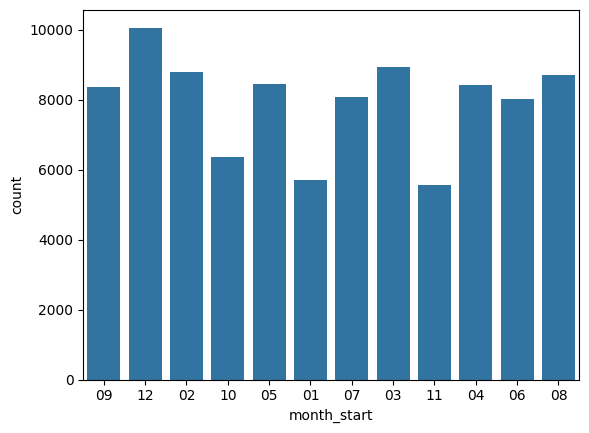

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='month_start' )
plt.show()

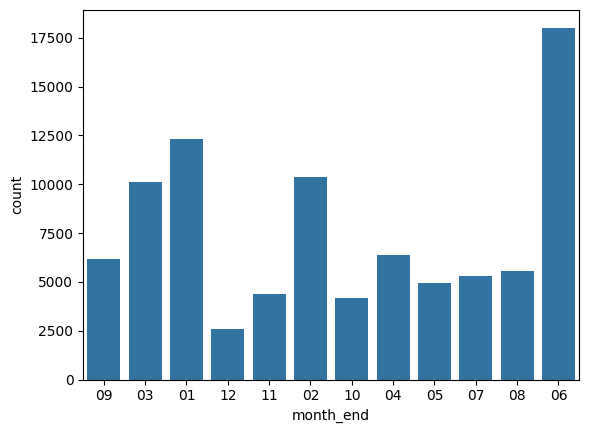

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='month_end' )
plt.show()

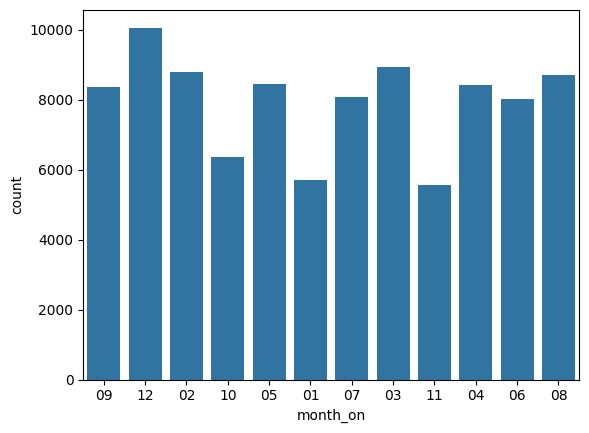

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='month_on' )
plt.show()

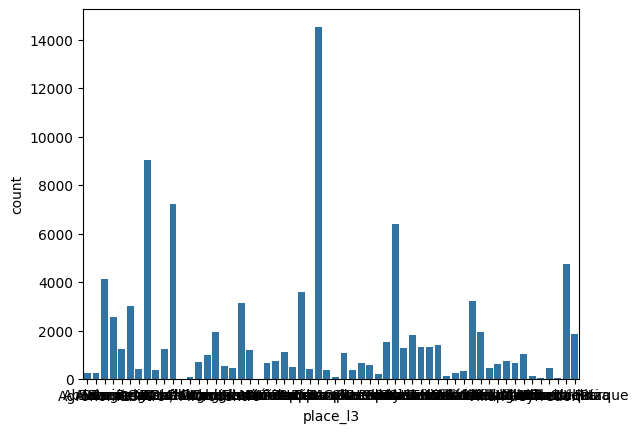

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='place_l3' )
plt.show()

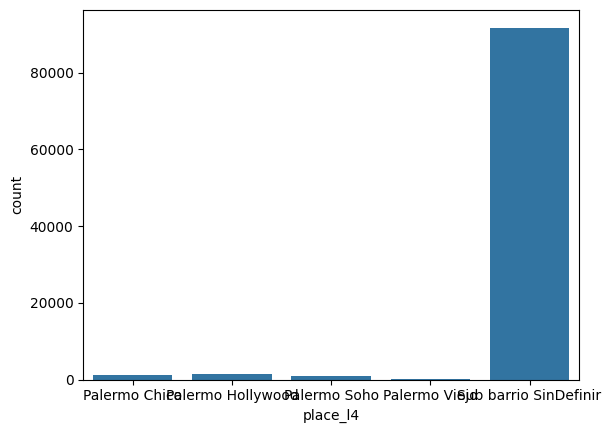

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='place_l4' )
plt.show()

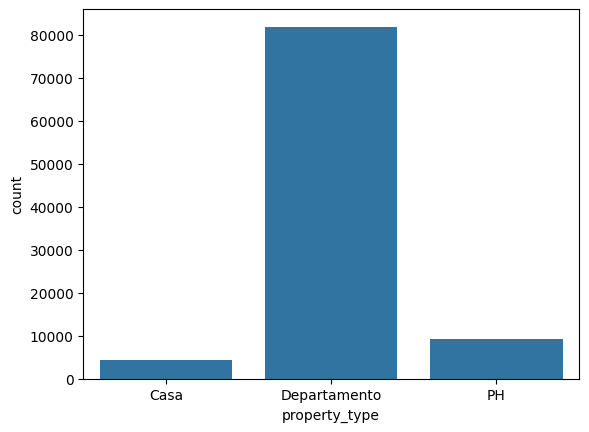

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='property_type' )
plt.show()

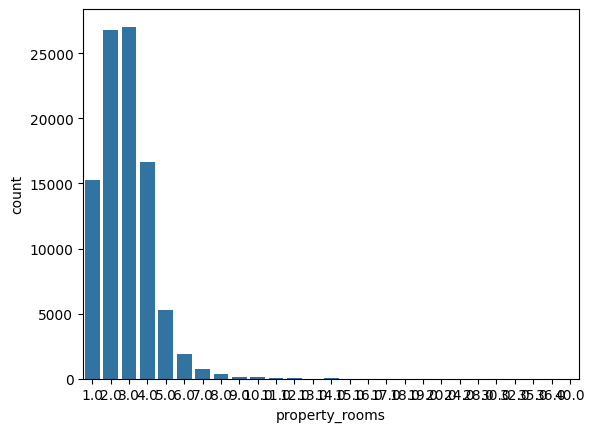

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='property_rooms' )
plt.show()

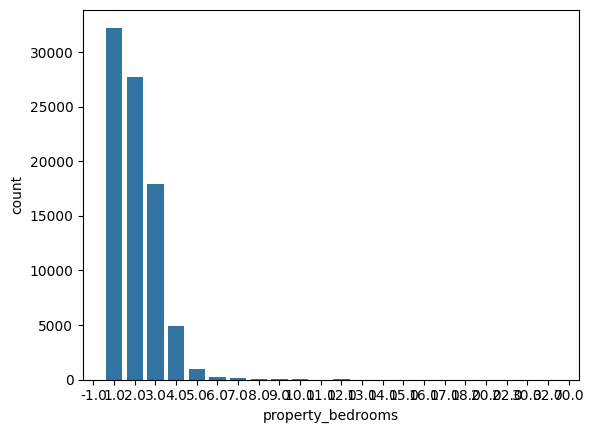

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='property_bedrooms' )
plt.show()

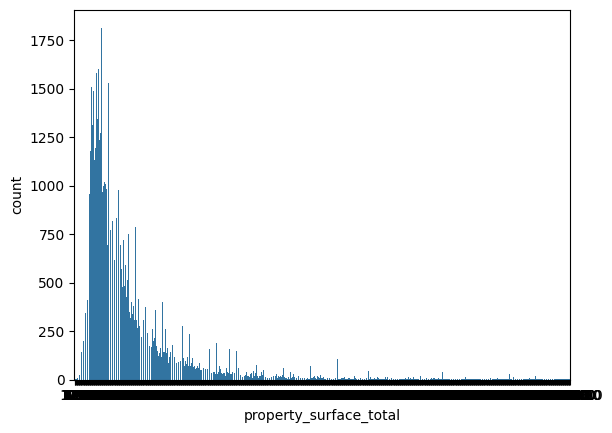

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='property_surface_total' )
plt.show()

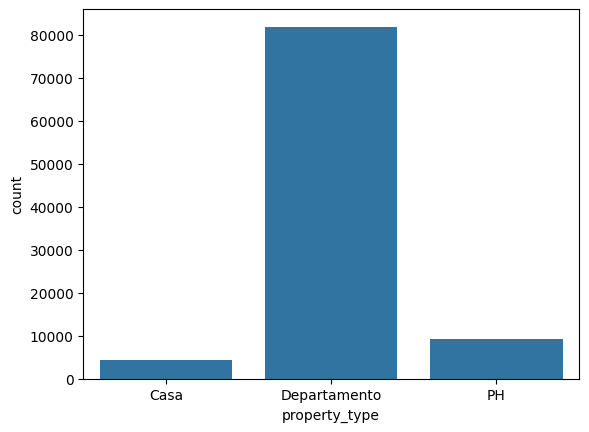

In [ ]:
#Grafico de Barras
sns.countplot(data=df_order, x='property_type' )
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

# load up some sample financial data
df_order = cbook.get_sample_data('goog.npz')['price_data']
# create two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pricemin = r["property_type"].min()

ax1.plot(r["property_price"], r["property_type"], lw=2)
ax2.fill_between(r["property_price"], pricemin, r["property_type"], alpha=0.7)

for ax in ax1, ax2:
    ax.grid(True)
    ax.label_outer()

ax1.set_ylabel('price')

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

<ipython-input-135-90e76a0aeec3>:7: MatplotlibDeprecationWarning: In a future release, get_sample_data will automatically load numpy arrays.  Set np_load to True to get the array and suppress this warning.  Set asfileobj to False to get the path to the data file and suppress this warning.
  df_order = cbook.get_sample_data('goog.npz')['price_data']


TypeError: '_io.BufferedReader' object is not subscriptable

In [ ]:
# Analizar las correlaciones existentes entre las variables